C:\Users\wmidd\AppData\Local\Temp\ipykernel_8024\1541415377.py:21: RuntimeWarning: invalid value encountered in sqrt
  omega_n = np.nan_to_num((2 * l / V) * np.sqrt((K_f * K_r) / (m * I)) * np.sqrt(1 + A * V**2), nan=0.0, posinf=0.0, neginf=0.0)


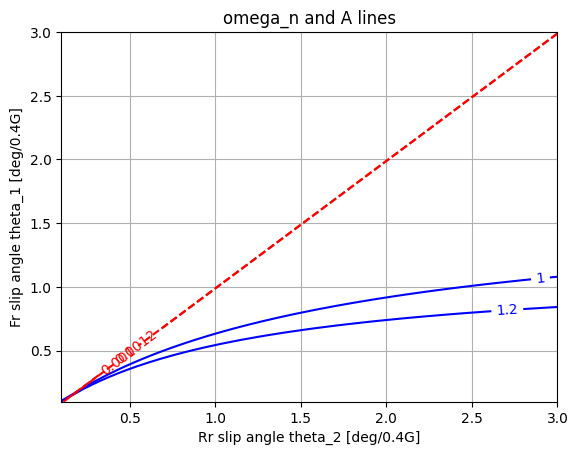

In [9]:
import numpy as np
import matplotlib.pyplot as plt

a = 4.0  # [m/s^2]
mf = 1000  # [kg]
mr = 700  # [kg]
l = 2.7  # [m] (2700mm -> m)
I = 2650  # [kgm^2]
V = 120 / 3.6  # [m/s] (120km/h -> m/s)
m = mf + mr

theta_1 = np.linspace(0.1, 3, 100)  # [deg/0.4G]
theta_2 = np.linspace(0.1, 3, 100)  # [deg/0.4G]

THETA_1, THETA_2 = np.meshgrid(theta_1, theta_2)

K_f = (mf * a) / (2 * THETA_1)
K_r = (mr * a) / (2 * THETA_2)

A = -(1/l) * (THETA_2/a - THETA_1/a)
omega_n = np.nan_to_num((2 * l / V) * np.sqrt((K_f * K_r) / (m * I)) * np.sqrt(1 + A * V**2), nan=0.0, posinf=0.0, neginf=0.0)


omega_n_lines = [1.0, 1.2]
A_lines = [1.0 * 10**(-3), 1.2 * 10**(-3)]


fig, ax = plt.subplots()

for omega_n_line in omega_n_lines:
    CS = ax.contour(THETA_1, THETA_2, omega_n, levels=[omega_n_line], colors='blue', linestyles='solid')
    ax.clabel(CS, inline=1, fontsize=10)

for A_line in A_lines:
    CS = ax.contour(THETA_1, THETA_2, A, levels=[A_line], colors='red', linestyles='dashed')
    ax.clabel(CS, inline=1, fontsize=10)

ax.set_xlabel('Rr slip angle theta_2 [deg/0.4G]')
ax.set_ylabel('Fr slip angle theta_1 [deg/0.4G]')
ax.set_title('omega_n and A lines')
ax.grid()

plt.show()
